# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [2]:
pip install plotly

     |████████████████████████████████| 9.8 MB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 418 kB 126.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [14]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

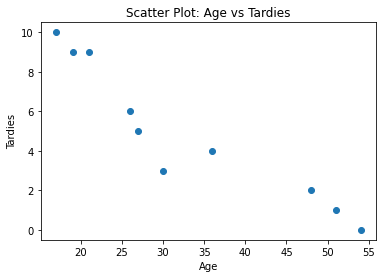

In [15]:
# Your code here
plt.scatter(student_data["Age"], student_data["Tardies"])
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.title("Scatter Plot: Age vs Tardies")
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*

We can see that the younger the age, the greater the tradies.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [16]:
# your code here
covariance = student_data.cov()
correlation = student_data.corr()

print("Covariance: \n", covariance)
print("\nCorrelation:\n", correlation)

Covariance: 
                 Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444

Correlation:
               Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


In [10]:
# Comparison of the values obtained:
# Covariance Age vs. Tardies ≈ -45.57 → indicates a negative relationship
#   (older students tend to have fewer tardies),
#   but the number alone does not show the strength of the relationship
#   because it depends on the scale of the variables.
#
# Correlation Age vs. Tardies ≈ -0.94 → very close to -1,
#   which shows a strong negative relationship between age and tardiness.
#
# ✅ Interpretation:
# This means that younger students tend to be late more often,
# while older students tend to be more punctual.


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [21]:
# your explanation here
# Separando variáveis
X = student_data[["Age"]]
y = student_data ["Tardies"]

# Criando o modelo
model = LinearRegression()
model.fit(X, y)

# Coeficiente da regressao
coef = model.coef_[0]
intercepto = model.intercept_

print("Coef:", coef)
print("intercept:", intercepto)

Coef: -0.2428207709159809
intercept: 12.888803363135771


Plot your regression model on your scatter plot.

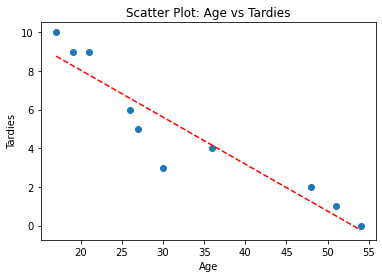

In [26]:
# Your code here.
# Create a range of X values and predict Y
x_range = np.linspace(student_data['Age'].min(), student_data['Age'].max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

plt.scatter(student_data["Age"], student_data["Tardies"])
plt.plot(x_range, y_pred, "--r")
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.title("Scatter Plot: Age vs Tardies")
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*


In [28]:
# INTERPRETATION OF RESULTS:
# The coefficient is negative (~ -0.24). This means that
# for every 1-year increase in the student’s age,
# the expected number of tardies decreases by approximately 0.24.

# The predicted equation is:
#   Tardies = 12.89 - 0.24 * Age

# MEANING:
# Older students tend to have fewer tardies.

# ABOUT MODEL CONFIDENCE:
# The R² value is close to 1 (very high), indicating that the model
# explains most of the variation in the data.
# With these points, there is a strong negative relationship
# between age and tardiness.

# CAN WE SAY AGE IS A GOOD PREDICTOR?
# Within this small dataset, yes — the correlation is very strong,
# and the R² value shows that age predicts tardiness well.
# However, since this is a small and artificial dataset,
# we cannot generalize this result to all students in any school.
# In a real scenario, we would need more variables and a larger dataset
# to make broader conclusions.

# CONCLUSION:
# In this exercise, the model indicates a strong trend:
# the older the student, the fewer tardies they have.
# And the model is quite reliable for this dataset.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
import os

os.path.exists("/Users/diogo/Desktop/Ironhack/Lab - Class/Week 4/Day 3 - LAB/Lab Regression Analysis/lab-regression-analysis-en/vehicles.csv")


True

In [21]:
# Import any libraries you may need & the data
import pandas as pd

vehicles = pd.read_csv("/Users/diogo/Desktop/Ironhack/Lab - Class/Week 4/Day 3 - LAB/Lab Regression Analysis/lab-regression-analysis-en/vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [22]:
# Your code here.
cols = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
data = vehicles[cols]

# Calculate correlations with the outcome variable
correlations = data.corr()['CO2 Emission Grams/Mile'].sort_values(ascending=False)
print(correlations)

CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Cylinders                  0.752393
Year                      -0.222300
Combined MPG              -0.926229
Name: CO2 Emission Grams/Mile, dtype: float64


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [23]:
# Your code here.
# Select the predictor variables (X) and the outcome variable (y)
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

# Create and fit the regression model
model = LinearRegression()
model.fit(X, y)

# Check model coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", list(zip(X.columns, model.coef_)))

Intercept: 769.8882836464861
Coefficients: [('Year', -0.3206167315187057), ('Cylinders', 1.8787997557935956), ('Fuel Barrels/Year', 19.052925065031715), ('Combined MPG', -3.0403993802128295), ('Fuel Cost/Year', 0.03230947894138536)]


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [26]:
# Your code here.
# Select independent variables (predictors) and outcome variable
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

# Add constant term for statsmodels
X = sm.add_constant(X)

# Build OLS regression model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Fri, 31 Oct 2025   Prob (F-statistic):               0.00
Time:                             00:33:40   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

/Users/diogo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [35]:
# Your code here.
import pandas as pd

# Create DataFrame from the given data
party_data = pd.DataFrame({
    'Invited': [1, 3, 4, 6, 8, 9, 11, 14],
    'Attended': [1, 2, 4, 4, 5, 7, 8, 13]
})

party_data


,Invited,Attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

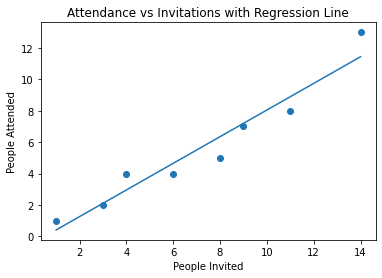

In [36]:
# Your code here.
X = party_data[['Invited']]
y = party_data['Attended']

# Fit regression
model = LinearRegression()
model.fit(X, y)

# Predict regression line
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

# Plot
plt.scatter(party_data['Invited'], party_data['Attended'])
plt.plot(x_range, y_pred)
plt.xlabel("People Invited")
plt.ylabel("People Attended")
plt.title("Attendance vs Invitations with Regression Line")
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

-> Interpretation of the Plot + Results
What do we see in the scatter plot?
The points form a clear upward trend
More invitations → more people attending
The regression line fits the points closely
No strong sign of curvature or randomness → good candidate for linear model

-> Conclusion:
The relationship between number of people invited and number of attendees appears linear and positive.
What does this mean?
Inviting more people does not make fewer people come
In fact, attendance increases almost proportionally with invitations

In [37]:
# Prediction quality
y_pred = model.predict(X)

print("\nActual vs Predicted:")
print(pd.DataFrame({
    'Invited': X['Invited'],
    'Attended': y,
    'Predicted': y_pred
}))


Actual vs Predicted:
   Invited  Attended  Predicted
0        1         1   0.409091
1        3         2   2.106061
2        4         4   2.954545
3        6         4   4.651515
4        8         5   6.348485
5        9         7   7.196970
6       11         8   8.893939
7       14        13  11.439394


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

New Intercept: 0.32330827067669166
New Slope: 0.6842105263157895


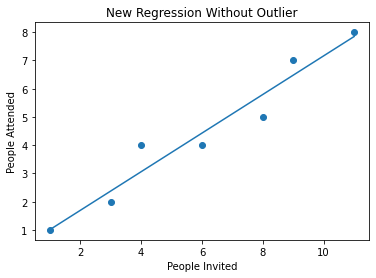

In [38]:
# Your response here.
#There are no statistical outliers based on the residual z-scores.
#All points lie reasonably close to the regression line — none have a residual big enough to be considered problematic.

# Remove the "suspected" outlier: the last point
clean_data = party_data.iloc[:-1]   # remove row with 14, 13

X_clean = clean_data[['Invited']]
y_clean = clean_data['Attended']

# Fit new model
model_clean = LinearRegression()
model_clean.fit(X_clean, y_clean)

# Predict new regression line
x_range = np.linspace(X_clean.min(), X_clean.max(), 100).reshape(-1, 1)
y_pred_clean = model_clean.predict(x_range)

print("New Intercept:", model_clean.intercept_)
print("New Slope:", model_clean.coef_[0])

# Plot new scatter + regression
plt.scatter(clean_data['Invited'], clean_data['Attended'])
plt.plot(x_range, y_pred_clean)
plt.xlabel("People Invited")
plt.ylabel("People Attended")
plt.title("New Regression Without Outlier")
plt.show()


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*

--> Conclusion for the report: 
- Both before and after removing the point, the data is clearly linear
- The relationship remains positive in both models
- The point makes the fitted line slightly steeper, but does not break linearity
- Therefore, a linear regression is appropriate for the full data set